# **Análisis exploratorio y estadística**
# AE14 - Introducción a conceptos de correlación


En este notebook  utilizaremos principalmente le dataset del Titanic para  reforzar las visualizaciones desarrolladas en los notebook anteriores, e introducir el conceptos de correlación.


Como punto de partida importaremos nuestras 4 librerías.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <font color='blue'>**Leyendo los datos**</font>

El código está adaptado para poder leer desde google drive, sin embargo, se puede modificar la ruta si es que se quiere trabajar en forma local.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/DATA SCIENCE UDD 2024/MODULO 3/'
trainFile = 'Copia de titanic_train.csv'

In [4]:
train_df = pd.read_csv(path + trainFile)

## <font color='blue'>**Nuestra estadística descriptiva**</font>

La siguiente, es el diccionario de datos del archivo:

1. Survival: Sobreviviente		0 = No, 1 = Si
2. Pclass: La clase del ticket	1 = 1st, 2 = 2nd, 3 = 3rd
3. Sex:	Sexo
4. Age: Edad en años
5. Sibsp:	Número de hermanas / cónyuges a bordo del Titanic
6. Parch:	Número de padres / hijos a bordo del Titanic
7. Ticket:	Número del ticket
8. Fare:	Tarifa de pasajero
9. Cabin: Número de cabina
10. Embarked: Puerto de embarque	C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000,257.354,1.00,223.500,446.000,668.5,891.000
Survived,891.0,0.384,0.487,0.00,0.000,0.000,1.0,1.000
Pclass,891.0,2.309,0.836,1.00,2.000,3.000,3.0,3.000
Age,714.0,29.699,14.526,0.42,20.125,28.000,38.0,80.000
SibSp,891.0,0.523,1.103,0.00,0.000,0.000,1.0,8.000
Parch,891.0,0.382,0.806,0.00,0.000,0.000,0.0,6.000
Fare,891.0,32.204,49.693,0.00,7.910,14.454,31.0,512.329


Qué puede decir de los distintos atributos? Cómo es la media y la mediana? Existe mucha diferencia entre ellas en algunas variables, por ejemplo **Survived**? Qué significa eso?

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## <font color='blue'>**Análisis categórico**</font>

Analicemos la variable __Survival__.

In [8]:
c_palette = ['tab:blue', 'tab:orange']

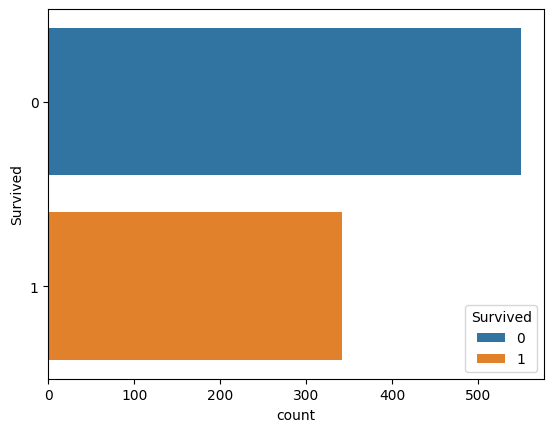

In [9]:
sns.countplot(y='Survived', hue='Survived', data=train_df, palette=c_palette)
plt.show()

Analicemos la variable __Sex__, pero agregando la codición de si sobrevició o no. Sobrevivientes por sexo:

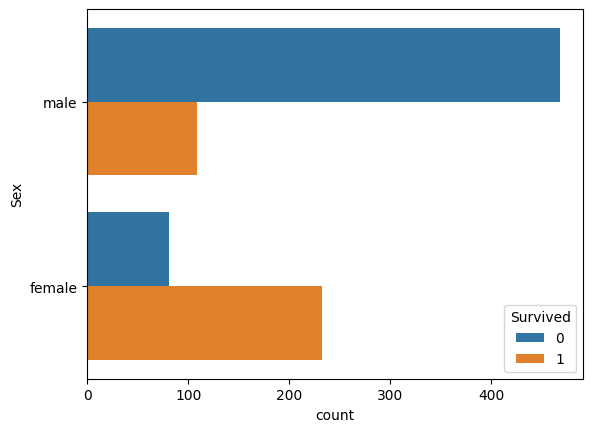

In [10]:
sns.countplot(y='Sex', hue='Survived', data=train_df, palette=c_palette)
plt.show()

En proporción sobrevivieron más mujeres que hombres. Sin embargo, es interesante explorar si esto se mantuvo bajo otras condiciones como por ejemplo donde embarcó o la clase en la que viajaba el pasajero.

### <font color='green'>**Actividad 1**</font>

Realice el mismo ejercicio anterior pero considere la variable **Embarked** y **Pclass**, siga diferenciando la visualización por la variable __Survived__.

Qué conclusión puede generar?

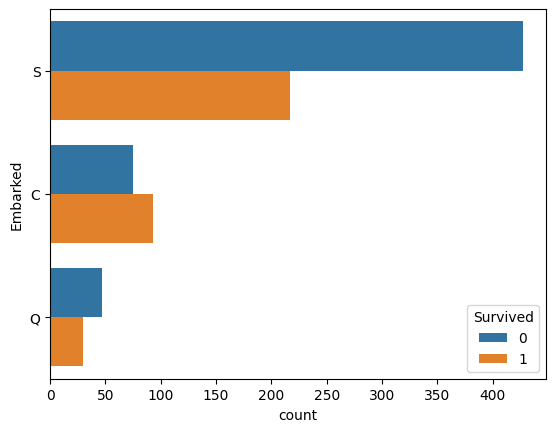

In [11]:
# Tu código aquí ...

# Variable Embarqued
sns.countplot(y='Embarked', hue='Survived', data=train_df, palette=c_palette)
plt.show()

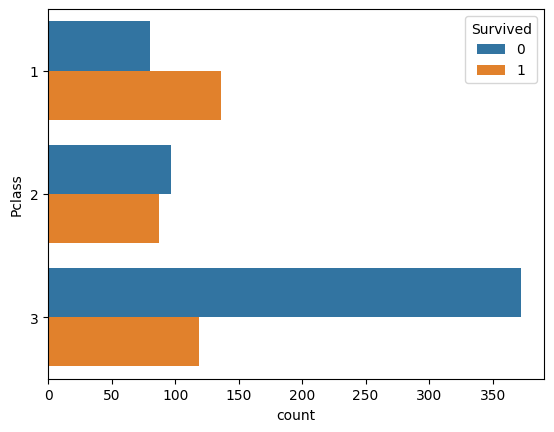

In [12]:
# Variable Pclass
sns.countplot(y='Pclass', hue='Survived', data=train_df, palette=c_palette)
plt.show()


<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Análisis cuantitativo**</font>

Analicemos la variable __Age__.

In [13]:
c_palette = ['tab:blue', 'tab:orange']
c_palette3 = ['tab:blue', 'tab:orange','tab:green']

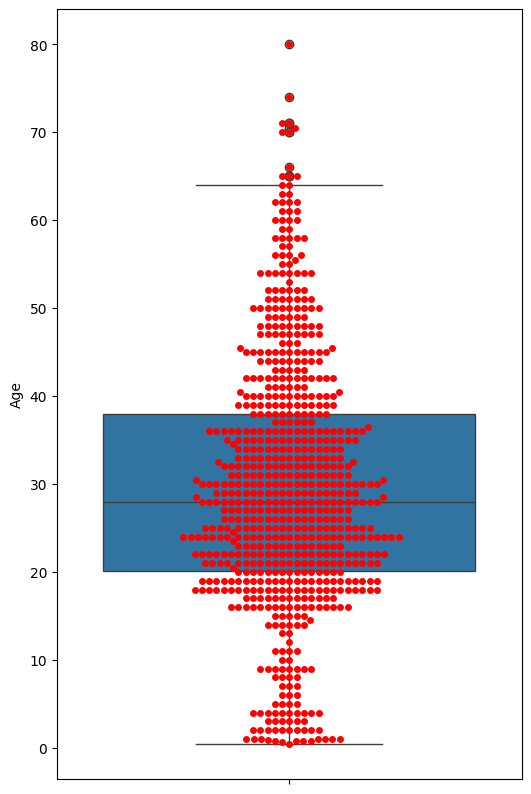

In [14]:
# Analisis univariado.
plt.figure(figsize=(6,10)) # Agrandamos la figura para hacerla más clara
sns.boxplot(y='Age', data=train_df)
sns.swarmplot(y='Age', data=train_df, color='r')
plt.show()

<ipython-input-15-ef682d977ca4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)


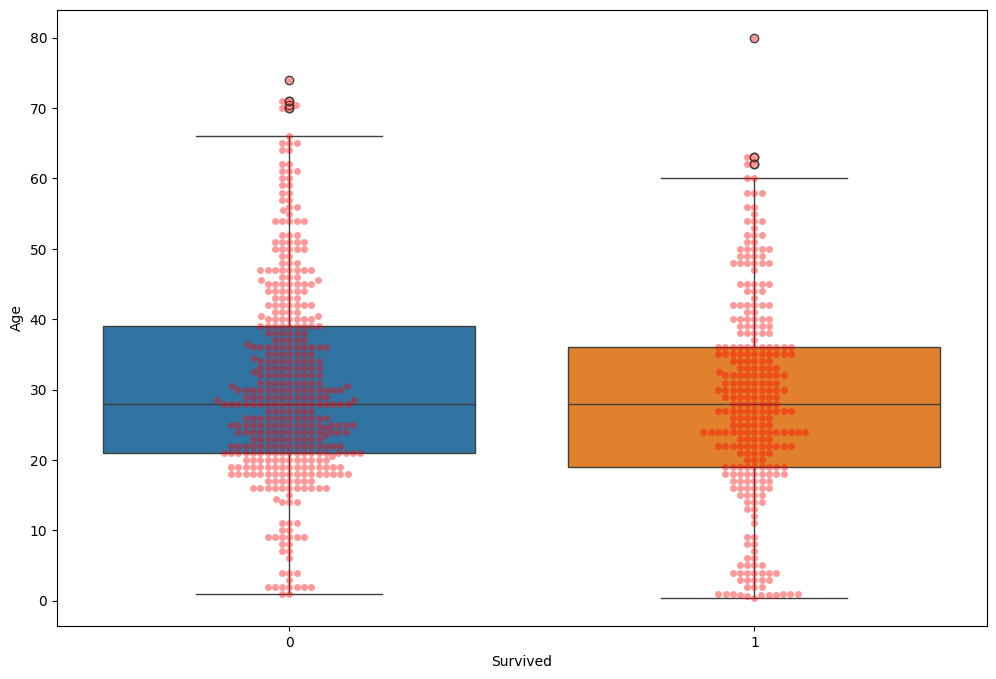

In [15]:
# Exploremos la edad pero considerando adicionalmente Survived
plt.figure(figsize=(12, 8)) # Agrandamos la figura para hacerla más clara
sns.boxplot(x='Survived', y='Age', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)
sns.swarmplot(x='Survived', y='Age', data=train_df, color='r', alpha=0.4)
plt.show()

Visualmente no se observa que existió una diferencia marcada por la edad entre los sobrevivientes y los que no.

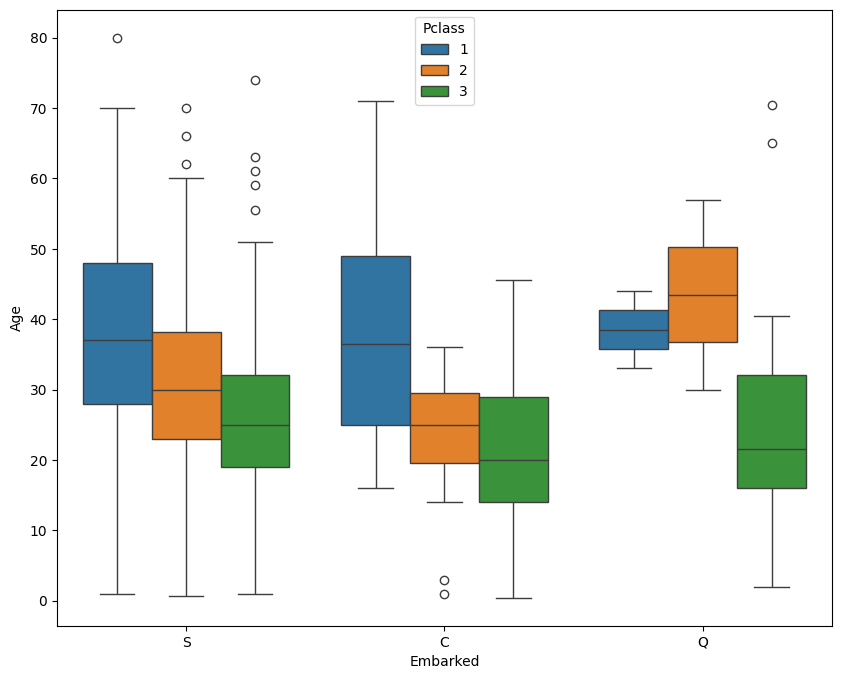

In [16]:
# Incoproremos la clase y el embarque para ver si existe relación entre la edad y estas variables.
plt.figure(figsize=(10, 8))
sns.boxplot(x='Embarked', y='Age', hue='Pclass',
            data=train_df, palette=c_palette3)
plt.show()

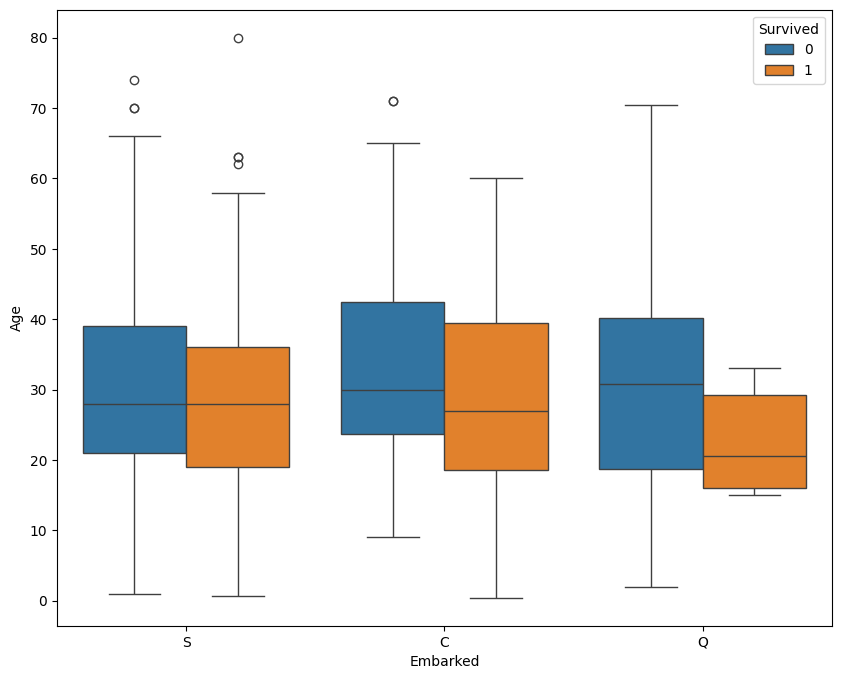

In [17]:
# Analicemos la relación entre Embarked, Age y Survived.

plt.figure(figsize=(10, 8))
sns.boxplot(x='Embarked', y='Age', hue='Survived',
            data=train_df, palette=c_palette)
plt.show()

### <font color='green'>**Actividad 2**</font>

1. Compare a través de un `boxplot` cómo es la dependencia entre la variable __Parch__, que representa el número de padres o hijos que viajaban, respecto de si sobrevivió o no.
2. Realice el mismo análisis para __SibSp__.

Incorpore también un _swarmplot_ para entender la cantidad de puntos relacionados.

Qué conclusión puede generar?

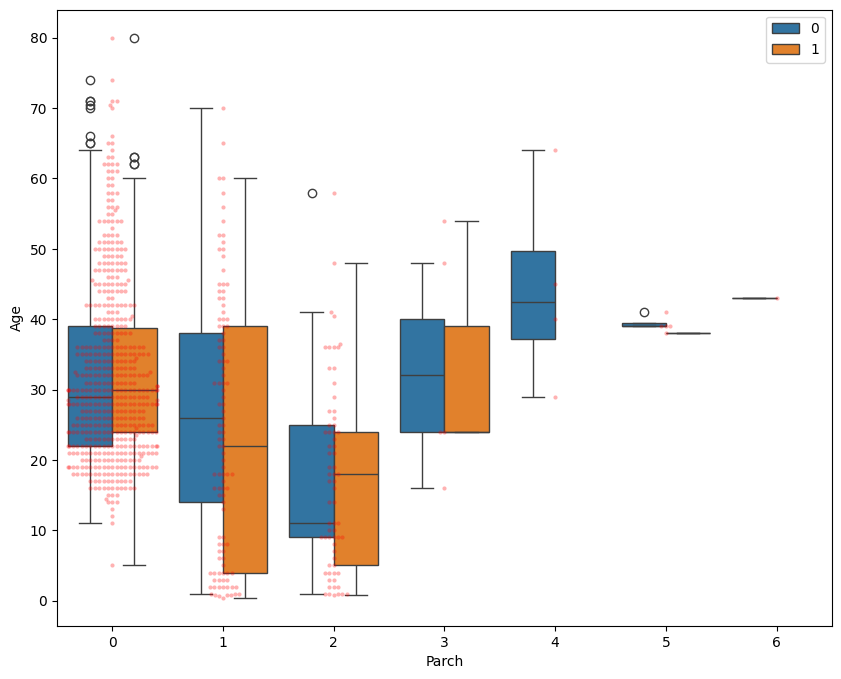

In [26]:
# Tu código aquí ...
# Pregunta 1. # Parent Child (Parch)
plt.figure(figsize=(10, 8))
sns.boxplot(x='Parch', y='Age', hue='Survived', data=train_df, palette=c_palette)
sns.swarmplot(x='Parch', y='Age', data=train_df, color='r', alpha=0.3, size=3)
plt.show()

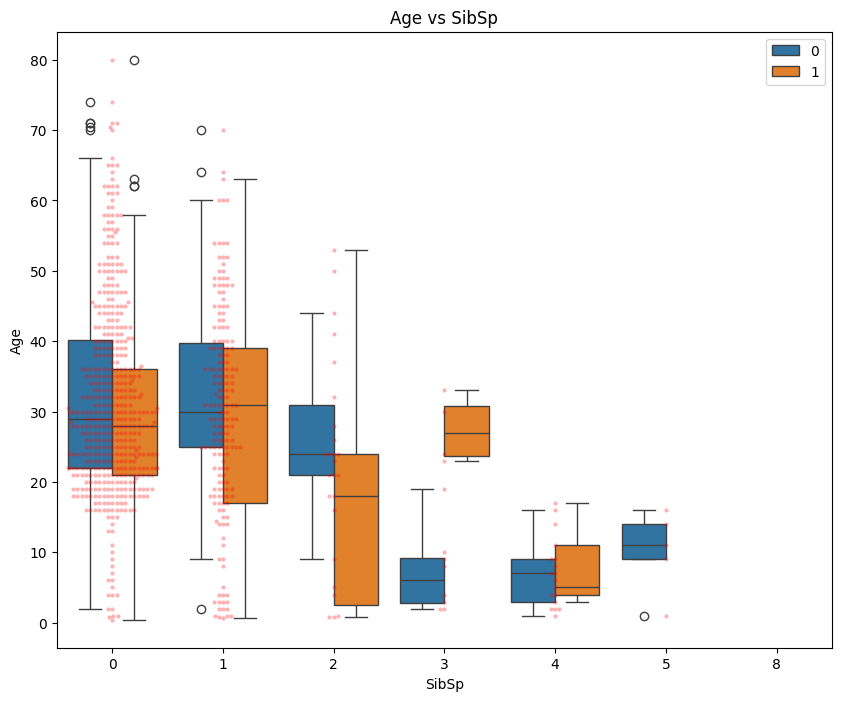

In [27]:
# Pregunta 2. Siblings Spouse (SibSp)
plt.figure(figsize=(10, 8))
sns.boxplot(x='SibSp', y='Age', hue='Survived', data=train_df, palette=c_palette)
sns.swarmplot(x='SibSp', y='Age', data=train_df, color='r', alpha=0.3, size=3)
plt.title('Age vs SibSp')
plt.show()

<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Análisis de correlación**</font>

###__¿Qué es la correlación?__<br>
La correlación es una medida estadística que expresa hasta qué punto dos variables están relacionadas linealmente (esto es, cambian conjuntamente a una tasa constante). Es una herramienta común para describir relaciones simples sin hacer afirmaciones sobre causa y efecto.

### __¿Cómo se mide la correlación?__<br>
Describimos la correlación mediante una __medida sin unidades__ llamada __coeficiente de correlación__, que va desde -1 a +1 y se indica mediante las letras $r$ o $\rho$ (para muestras o poblaciones respectivamente); este coeficiente cuantifica la intensidad de la relación. La significancia estadística se indica mediante un valor p. Por tanto, usualmente las correlaciones se escriben con dos números clave: $r$ y $p$.
Existen varios estadísticos desarrollados con el objetivo de medir este tipo de asociación, algunos de los más empleados son __Pearson__, __Spearman__ y __Kendall__.

* Cuanto más se aproxima $r$ a cero, más débil es la relación lineal.
* Los valores de $r$ positivos indican una correlación positiva, en la que los valores de ambas variables tienden a incrementarse juntos.
* Los valores de $r$ negativos indican una correlación negativa, en la que los valores de una variable tienden a incrementarse mientras que los valores de la otra variable descienden.
El valor $p$ aporta evidencia de que podemos concluir de manera significativa que es probable que el coeficiente de correlación de la población sea diferente a cero, basándonos en lo que hemos observado en la muestra.
* El que sea una "medida sin unidades" significa que la correlación tiene su propia escala: en nuestro ejemplo, el número de $r$ no está en la misma escala que la altura ni que la temperatura. Esto es diferente a otros estadísticos de resumen. Por ejemplo, la media de las medidas de altura está en la misma escala que su variable.

__¿Cuáles son algunas limitaciones del análisis de correlación?__<br>
La correlación no puede medir la presencia o el efecto de otras variables aparte de las dos que se están explorando. Es importante saber que la correlación no nos informa sobre causas y efectos. Además, la correlación no puede describir con precisión las relaciones curvilíneas.

### __Covarianza__
Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación. Uno de estos parámetros es la __covarianza__, que mide el grado de variación conjunta de dos variables aleatorias.

<br><br>
$$
\text{Covarianza}\: \text{muestral} = Cov(X,Y) = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i - \bar{y})} {N-1}$$
<br>
donde  $\bar{x}$  e  $\bar{y}$  son la media de cada variable, y $x_i$  e $y_i$  son los valores de las variables para la observación $i$ .


<br>
En la siguiente imagen vemos varios grupos de puntos $(x,y)$, con el coeficiente de correlación para cada grupo. Nótese que la correlación refleja la no linealidad y la dirección de la relación lineal. En la figura del centro, la varianza de $y$ es nula, por lo que la correlación es indeterminada.

<img src="https://drive.google.com/uc?export=view&id=1THxrficSNSUI3xx5U7nNdtKVZZv0zZBC" width='600'><br>
Image: Denis Boigelot

Valores positivos indican que las dos variables cambian en la misma dirección y, valores negativos, que lo hacen en direcciones opuestas.

La principal limitación de la covarianza es que, su magnitud, depende de las escalas en que se miden las variables estudiadas. Esto implica que no puede utilizarse para comparar el grado de asociación entre pares de variables medidas en distintas escalas. Una forma de evitar esta limitación, y poder hacer comparaciones, consiste en estandarizar la covarianza, generando lo que se conoce como coeficientes de correlación.


### __Significancia estadística__

Además del valor obtenido para el coeficiente de correlación, es necesario calcular su significancia estadística. Por muy cercano que sea el valor del coeficiente de correlación a  +1  o  −1 , si no es significativo, no se dispone de evidencias suficiente para afirmar que existe una correlación real, ya que el valor observado podría deberse a simple aleatoriedad.

El test paramétrico de significancia estadística empleado para el coeficiente de correlación es el t-test. Donde el estadístico t se obtiene acorde a la ecuación:
$$
t = \frac{r \sqrt{N - 2}} {\sqrt{1 - r^2}}
$$

donde, $r$ es el valor del coeficiente de correlación y $N = n_x + n_y$ es el número de observaciones disponibles de ambas variables. Los grados de libertad se calculan como  $df=N-2$ (un grado de libertad menos por cada variable).

En este test, se considera como hipótesis nula ($H_0$ ) que las variables son independientes (coeficiente de correlación poblacional = 0), y como hipótesis alternativa ($H_1$), que sí existe relación (coeficiente de correlación poblacional $\ne$ 0).

### __Tamaño de efecto__

La correlación lineal, además del valor del coeficiente de correlación y de sus significancia, también tiene un tamaño de efecto asociado conocido como coeficiente de determinación $R^2$.

$R^2$  se interpreta como la cantidad de varianza de $Y$  explicada por $X$. En el caso del coeficiente de Pearson y el de Spearman, $R^2$  se obtiene elevando al cuadrado el coeficiente de correlación. En el caso de Kendall no se puede calcular de este modo.


### **Correlacion de Pearson**
La correlación de Pearson mide la relación lineal entre dos variables en base a la covarianza estandarizada. La definicion forma es:

$$ \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y}$$


La anterior ecuación se corresponde con el coeficiente de Pearson poblacional ($\rho$ ). En la práctica, raramente se tiene acceso a toda la población, por lo que su valor se estima a partir de una muestra mediante el coeficiente de Pearson muestral ($r$): <br><br>

$$
r_{x,y} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})} {\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$

__Condiciones__

Las condiciones que se deben de cumplir para que el coeficiente de correlación de Pearson sea válido son:

* La relación que se quiere estudiar es de tipo lineal (de lo contrario, el coeficiente de Pearson no la puede detectar).

* Las dos variables deben de ser numéricas.

* Normalidad: ambas variables se tienen que distribuir de forma normal. En la práctica, se suele considerar válido aun cuando se alejan moderadamente de la normalidad.

* Homocedasticidad: la varianza de  $Y$ debe ser constante a lo largo de la variable  $X$. Esto se puede contrastar si en un scatterplot los valores de  $Y$  mantienen la misma dispersión en las distintas zonas de la variable  $X$ .

Veamos la correlación de las variables en el caso del dataset del Titanic.

In [20]:
# Eliminamos las variables categoricas
corr_df = train_df.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
corr_df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [21]:
# Hay NaN, los rellenamos con la moda
corr_df['Age'] = corr_df['Age'].fillna(value=corr_df['Age'].mode()[0])
corr_df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,24.0
889,26.0


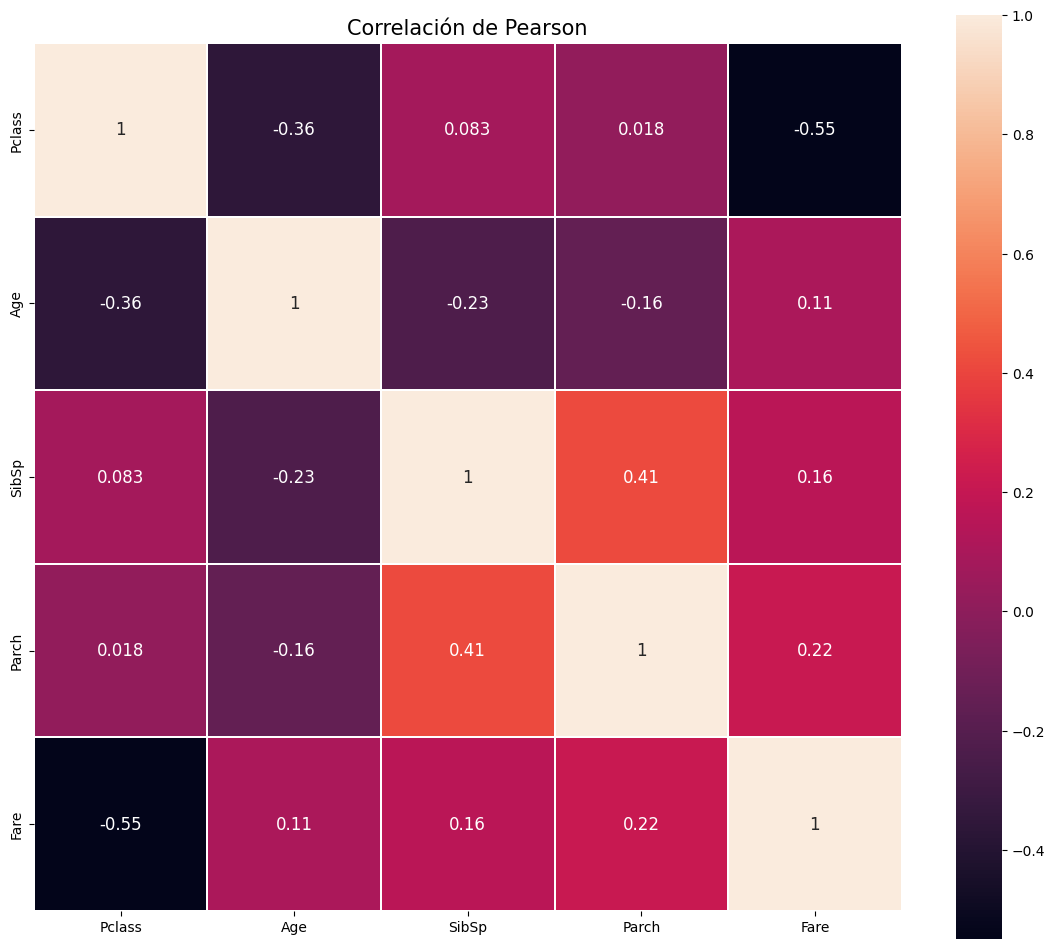

In [22]:
plt.figure(figsize=(14,12))
plt.title('Correlación de Pearson', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(corr_df.corr(),
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

Considere la siguiente escala:

|Valor|Fuerza de la asociación|
|:---:|:----------------------|
|0    |Asociación nula        |
|0.1  |Asociación pequeña     |
|0.3  |Asociación mediana     |
|0.5  |Asociación moderada    |
|0.7  |Asociación alta        |
|0.9  |Asociación muy alta    |

Qué relación interesante aparece?<br>
Qué tipo relación hay entre las variables?<br>
Cuál de ellas tienen las correlaciones positivas o negativas más altas?

Hay una correlación negativa moderada entre Fare y Pclass

# <font color='purple'>Reflexión Grupal </font>

Al finalizar este módulo, hemos logrado consolidar nuestra comprensión de las herramientas clave en la manipulación, análisis y visualización de datos usando Python, específicamente matplotlib y seaborn. A través de los ejercicios y clases, hemos mejorado nuestra capacidad para representar datos de manera efectiva, permitiendo una exploración más profunda y significativa de los conjuntos de datos.

**Matplotlib** ha sido fundamental en el proceso de visualización, ya que nos ha permitido crear gráficos versátiles, desde simples líneas hasta complejas representaciones de datos. La capacidad de personalizar los gráficos, el control sobre los ejes, las leyendas y los colores nos ha dado un alto nivel de flexibilidad para ajustar las visualizaciones a nuestras necesidades.

**Seaborn**, por otro lado, ha proporcionado un nivel adicional de sofisticación en nuestras visualizaciones. Gracias a su diseño optimizado y las funciones integradas para crear gráficos complejos como heatmaps, boxplots, violin plots y pairplots, hemos podido obtener insights más rápidamente y de una manera visualmente atractiva. Seaborn se distingue por facilitar la creación de gráficos estadísticos complejos de forma sencilla, con un enfoque más intuitivo que matplotlib, lo que ha reducido el tiempo de codificación para obtener resultados precisos.

**En las clases de este módulo, hemos trabajado con diversas técnicas como:**

Gráficos de dispersión y mapas de calor en matplotlib, que nos permitieron explorar relaciones entre variables y patrones de comportamiento.
Boxplots y subgráficos en matplotlib, facilitando la comparación de distribuciones y visualización de diferentes aspectos de los datos.

La introducción de seaborn con gráficos como barras, violin plots, y stripplots, nos ha dado herramientas poderosas para representar la distribución y relación de nuestras variables con mayor claridad.

La implementación de técnicas de análisis exploratorio de datos (EDA) y estadística descriptiva, que nos ayudaron a comprender mejor las características generales de los datos antes de aplicar modelos más complejos.



**Gonzalo:**

Como ingeniero de estudios en AIEP, una de las instituciones de educación superior técnico-profesional más grandes e importantes de Chile, mi rol implica trabajar con grandes volúmenes de datos para generar informes y análisis detallados que apoyen la toma de decisiones académicas y administrativas. En este contexto, el uso de matplotlib y seaborn ha sido clave para optimizar y transformar la manera en que manejo y visualizo la información.

**Matplotlib** ha sido fundamental para crear visualizaciones claras y personalizadas que me permiten presentar datos de manera comprensible a distintos públicos dentro de la institución. Desde gráficos sencillos hasta representaciones más complejas, esta herramienta me ha ofrecido la flexibilidad necesaria para ajustar los gráficos a los requisitos específicos de los informes y presentaciones, manteniendo la precisión y claridad visual en cada uno de ellos.

Por otro lado, **seaborn** me ha permitido llevar las visualizaciones a un nivel superior. Con su capacidad para generar gráficos estadísticos avanzados de manera más sencilla, como heatmaps, boxplots y pairplots, he podido explorar patrones ocultos en los datos y detectar correlaciones que de otra manera habrían sido difíciles de identificar. Esto ha sido especialmente útil cuando trabajo con grandes cantidades de información sobre el desempeño académico de los estudiantes, la distribución de recursos, o el análisis de tendencias históricas.

El uso combinado de matplotlib y seaborn ha mejorado mi capacidad para realizar análisis exploratorio de datos (EDA), lo que me permite tomar decisiones informadas sobre qué métricas y variables son más relevantes para las investigaciones y proyectos educativos en los que participo. Estas herramientas no solo han agilizado mi trabajo, sino que también me han permitido comunicar resultados de manera efectiva a otros equipos de trabajo, facilitando la comprensión de los datos de manera intuitiva y visual.


**Alejandro**

Python se ha consolidado como uno de los lenguajes más utilizados en ciencia de datos debido a su versatilidad y la amplia gama de bibliotecas disponibles. En mi rol como analista en una empresa semillera, utilizo Python para manejar grandes volúmenes de datos relacionados con la producción, rendimiento y calidad de las semillas. La capacidad de procesar, analizar y visualizar estos datos es fundamental para tomar decisiones informadas que impactan en la producción agrícola.

Tanto Matplotlib como Seaborn son herramientas valiosas en mi caja de herramientas como analista de datos en la industria semillera. Mientras Matplotlib proporciona una base sólida y flexible para crear visualizaciones personalizadas, Seaborn simplifica el proceso y mejora la estética, permitiendo una exploración rápida y efectiva de los datos. Juntas, estas bibliotecas no solo mejoran nuestra capacidad para analizar datos complejos, sino que también fortalecen nuestra comunicación visual, lo cual es crucial en un campo donde las decisiones informadas pueden tener un impacto significativo en la producción agrícola.


**Fernanda**

Los aprendizajes obtenidos en este módulo representan un apoyo significativo para mi trabajo como Project Manager, ya que las herramientas de visualización y análisis de datos me permiten explorar y comunicar patrones de manera más clara y efectiva. En el contexto de las Plantas de Tratamiento de Aguas Residuales (PTARs) con las que trabajo, poder analizar las relaciones entre variables, como niveles, flujos o concentraciones, es fundamental para optimizar procesos y tomar decisiones informadas. Además, las técnicas avanzadas como gráficos de dispersión con regresión o mapas de calor ayudan a detectar tendencias e identificar correlaciones que podrían pasar desapercibidas. Esto no solo mejora mi comprensión de los datos, sino también la forma en que los presento a equipos técnicos o directivos.

Por otra parte, saber interpretar estos gráficos mejora mi comunicación con el equipo de Data Science, que son los encargados de realizar los análisis exploratorios de los datos y generar los modelos de IA de optimización de procesos de planta. De esta forma, podré apoyar de mejor manera con mis conocimientos de ingeniería química para determinar que las correlaciones encontradas tienen un sentido operacional y de procesos.

**Rodrigo**


**En resumen**

El uso combinado de matplotlib y seaborn ha sido esencial para mejorar nuestra capacidad de visualizar y explorar los datos. Hemos aprendido a interpretar patrones, detectar correlaciones y comunicar de manera efectiva los resultados obtenidos. La habilidad de personalizar cada visualización y la riqueza de gráficos ofrecidos por estas bibliotecas nos brindan una base sólida para enfrentar proyectos de análisis de datos más complejos en el futuro.

Este módulo no solo nos ha permitido mejorar nuestra competencia técnica, sino que también nos ha preparado para transmitir nuestros hallazgos de manera clara y efectiva, facilitando la toma de decisiones informadas dentro de cualquier ámbito profesional.


### <font color='purple'>Fin Reflexión Grupal </font>
